In [1]:
import sys
!{sys.executable} -m pip install opencv-python

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import uniform_filter


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

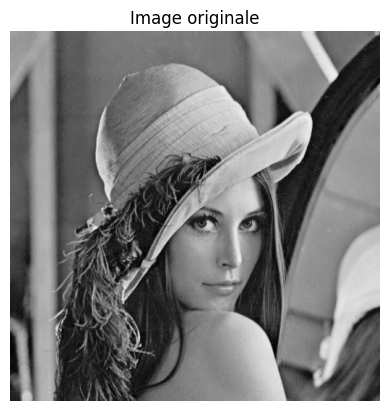

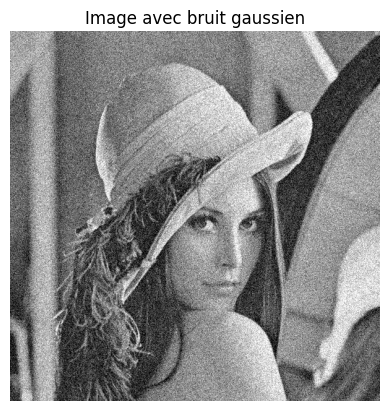

PSNR entre l'image originale et l'image bruitée :  20.084138497203007


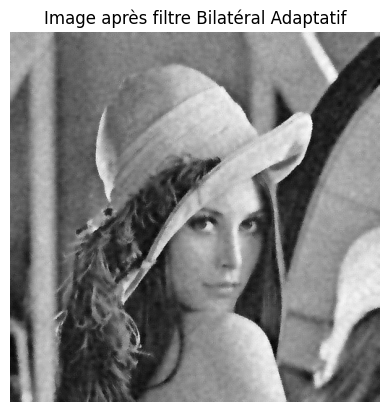

PSNR entre l'image originale et l'image débruitée :  28.706493826885243


In [ ]:
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import cv2
from scipy.ndimage import uniform_filter

# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename, as_gray=True)  # Lecture en nuances de gris
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

image = import_image("lena.pgm")
display_image(image, "Image originale")

image = image / 255.0

noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1) 
display_image(image_noised, 'Image avec bruit gaussien')

psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)


L = 2  
local_mean = uniform_filter(image_noised, size=(2*L + 1))
local_mean_sq = uniform_filter(image_noised**2, size=(2*L + 1))
local_variance = local_mean_sq - local_mean**2


# Plus la variance est faible = plus sigmaColor est faible.
sigmaColor_base = 75
sigmaColor_adaptive = sigmaColor_base / (1 + local_variance * 10)  # Ajustez le multiplicateur pour affiner

image_filtree = np.zeros_like(image_noised)

#filtre bilatéral avec les valeurs adaptatives de sigmaColor
for i in range(image_noised.shape[0]):
    for j in range(image_noised.shape[1]):
        sigmaColor = sigmaColor_adaptive[i, j]
        
        patch = (image_noised * 255).astype(np.uint8)
        image_filtree[i, j] = cv2.bilateralFilter(patch, d=9, sigmaColor=sigmaColor, sigmaSpace=75)[i, j] / 255.0

display_image(image_filtree, "Image après filtre Bilatéral Adaptatif")

psnr_originale_debruitee = psnr(image * 255, image_filtree * 255)
print("PSNR entre l'image originale et l'image débruitée : ", psnr_originale_debruitee)

ski.io.imsave("results/noised.pgm", (image_noised * 255).astype(np.uint8))
ski.io.imsave("results/denoised.pgm", (image_filtree * 255).astype(np.uint8))
